Consideramos un pozo cuántico unidimensional de ancho L, en el que el potencial V(x) no es constante.  Utilizamos una base de funciones seno para aproximar la función de onda, de modo que
$$
\int_0^L x \sin\left(\frac{m\pi x}{L}\right) \sin\left(\frac{n\pi x}{L}\right) dx =
\begin{cases}
0, & \text{si } m \ne n \text{ y } m, n \text{ son ambos pares o ambos impares}, \\\\[6pt]
-\left(\frac{2L}{\pi}\right)^2 \frac{mn}{(m^2 - n^2)^2}, & \text{si } m \ne n \text{ y uno es par y el otro impar}, \\\\[6pt]
\frac{L^2}{4}, & \text{si } m = n.
\end{cases}
$$
con $V(x) = ax/L$. Usamos unidades tales que $\hbar = m = 1 = L = 1$.

*Problema extraído de [1] pp. 248- 250*

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../metodos")
from libMetodos import QR, QRdescomp

In [45]:
# Constantes 
L = 1.0
hbar = 1.0
m = 1.0
a = 10.0  # en eV

# Definimos el potencial V(x)
V = lambda x: a * x / L

In [ ]:
# Funcion para elementos de la matriz Hamiltoniana 
def H_elementos(m, n):
    if m == n:
        En = (n * np.pi)**2 * hbar**2 / (2 * m * L**2)
        Vmn = (L**2 / 4) * a
        return En + Vmn
    elif (m % 2 == 0 and n % 2 == 0) or (m % 2 == 1 and n % 2 == 1):
        return 0.0
    else:
        factor = (-8 * a * m * n * L**2) / (np.pi**2 * (m**2 - n**2)**2)
        return factor
    
# Funcion para construir matriz Hamiltoniana de N x N
def construir_H(N):
    H = np.zeros((N, N))
    for m in range(1, N + 1):
        for n in range(1, N + 1):
            H[m-1, n-1] = H_elementos(m, n)
    return H


In [42]:
# Base seno para construir eingenfunciones
def base_seno(n, x):
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

def psi_x(eigvec):
    return sum(eigvec[n] * base_seno(n + 1, x) for n in range(len(eigvec)))

### Construye numéricamente una matriz de tamaño $10×10$ y obtén sus autovalores. Estos representan las energías permitidas del sistema. A partir de los eigenvectores obtenidos, reconstruye las funciones de onda $\psi_n(x)$ como combinación lineal de funciones seno. Grafica $|\psi_n(x)|^2$ para los tres primeros estados.

Mi computadora no cuenta con la capacidad de procesamiento necesaria para ejecutar eficientemente los métodos que implementé. Aunque logra construir la matriz Hamiltoniana, la ejecución del método QR resulta excesivamente lenta. No obstante, tal como se sugiere en [1], es posible utilizar la función linalg.eigh de la biblioteca NumPy, la cual está optimizada para este tipo de problemas. Esta alternativa es la que se implementa a continuación.

Este es el código que debío haberse corrido:
```python
# NO PUDE CORRERLO EN MI COMPUTADORA
H10 = construir_H(10)
eigvals_10, _ = QR(H10)
H10 = np.sort(eigvals_10)

print("Primeros 10 eigenvalores con matriz 10x10 (en eV):")
print(H10)

In [43]:
# Construimos H y obtenemos autovalores y autovectores
N = 10
H = construir_H(N)
eigvals, eigvecs = np.linalg.eigh(H)
eigvals_sorted = np.sort(eigvals)

# Imprimir los primeros 10 autovalores
print("Primeros 10 autovalores:")
print(eigvals_sorted[:10])

Primeros 10 autovalores:
[ 6.80565818 12.23565198 17.26466158 22.22282836 27.16581208 32.10448828
 37.04159498 41.98490398 46.96402609 52.62449553]


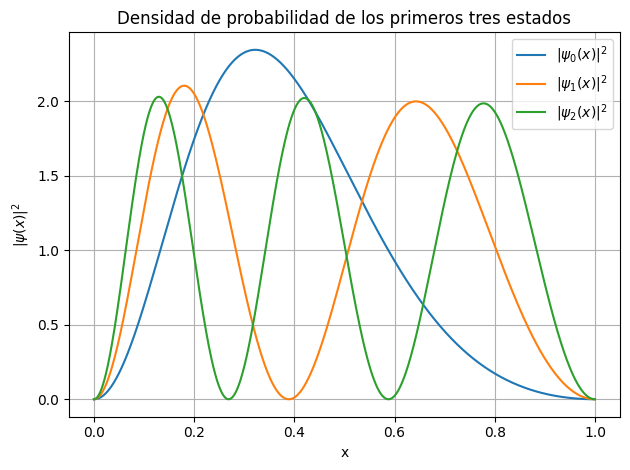

In [44]:
# Graficamos las densidades de probabilidad de los primeros 3 estados
x = np.linspace(0, L, 1000)
for i in range(3):
    psi = psi_x(eigvecs[:, i])
    norm = np.trapz(np.abs(psi)**2, x)
    psi /= np.sqrt(norm)
    plt.plot(x, np.abs(psi)**2, label=fr"$|\psi_{i}(x)|^2$")

plt.title("Densidad de probabilidad de los primeros tres estados")
plt.xlabel("x")
plt.ylabel(r"$|\psi(x)|^2$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Repite el proceso para una matriz de tamaño $100×100$.

```python
# NO PUDE CORRERLO EN MI COMPUTADORA
H100 = construir_H(100)
eigvals_100, _ = QR(H100)
H100 = np.sort(eigvals_100)

print("\nPrimeros 10 eigenvalores con matriz 100x100 (en eV):")
print(H100[:10])

In [39]:
# Construimos H y obtenemos autovalores y autovectores
N = 100
H = construir_H(N)
eigvals, eigvecs = np.linalg.eigh(H)
eigvals_sorted = np.sort(eigvals)

# Imprimir los primeros 10 autovalores
print("Primeros 10 autovalores:")
print(eigvals_sorted[:10])

Primeros 10 autovalores:
[ 6.80565622 12.23564376 17.26464681 22.22277184 27.1657228  32.10405489
 37.04063349 41.97642534 46.91182289 51.84700459]


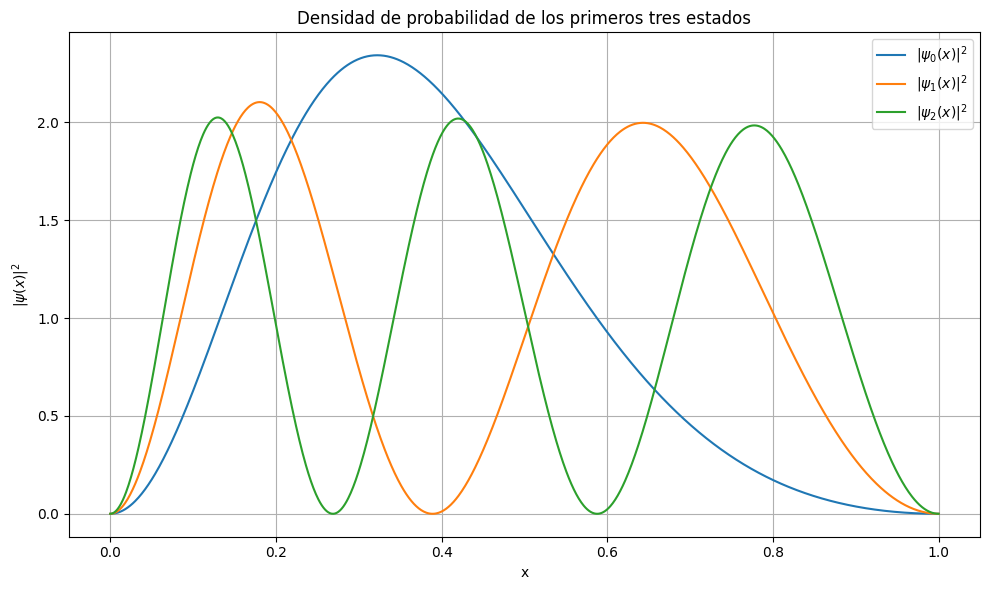

In [40]:
# Graficamos las densidades de probabilidad de los primeros 3 estados
x = np.linspace(0, L, 1000)

def psi_x(eigvec):
    return sum(eigvec[n] * base_seno(n + 1, x) for n in range(len(eigvec)))

plt.figure(figsize=(10, 6))
for i in range(3):
    psi = psi_x(eigvecs[:, i])
    norm = np.trapz(np.abs(psi)**2, x)
    psi /= np.sqrt(norm)
    plt.plot(x, np.abs(psi)**2, label=fr"$|\psi_{i}(x)|^2$")

plt.title("Densidad de probabilidad de los primeros tres estados")
plt.xlabel("x")
plt.ylabel(r"$|\psi(x)|^2$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()